Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">Elias</p>| <p style="text-align: left">Mindelberger</p> | k12043382 |
| <p style="text-align: left">Pascal</p>| <p style="text-align: left">Pilz</p> | k12111234 |



<h2 style="text-align: center">344.075 KV: Natural Language Processing (WS2022/23)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 3</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with PyTorch and BERT</h2>

<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Authors:** Navid Rekab-saz, Oleg Lesota<br>


<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-tensorboard"><li style="font-size:large;font-weight:bold">Bonus Task: Logging and Publishing Experiment Results (2 extra point)</li></a>
    <a href="#section-taskA"><li style="font-size:large;font-weight:bold">Task A: Document Classification with PyTorch (25 points)</li></a>
    <a href="#section-taskB"><li style="font-size:large;font-weight:bold">Task B: Document Classification with BERT (15 points)</li></a>
    
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

### Assignment objective
This assignment aims to provide the necessary practices for learning the principles of deep learning programing in NLP using PyTorch. To this end, Task A provides the space for becoming fully familiar with PyTorch programming by implementing a "simple" document (sentence) classification model with PyTorch, and Task B extends this classifier with a BERT model. As the assignment requires working with PyTorch and Huggingface Transformers, please familiarize yourself with these libraries using any possible available teaching resources in particular the libraries' documentations. The assignment has in total **40 points**, and also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.


### Libraries & Dataset

The assignment should be implemented with recent versions of `Python`, `PyTorch` and, `transformers`. Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from the Moodle page of the course.

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.label.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.


### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.



<a name="section-tensorboard"></a><h2 style="color:rgb(0,120,170)">Bonus Task: Logging and Publishing Experiment Results (2 extra point)</h2>

In all experiments of this assignment, use any experiment monitoring tool like [`TensorBoard`](https://www.tensorflow.org/tensorboard), [`wandb`](https://wandb.ai) to log and store all useful information about the training and evaluation of the models. Feel free to log any important aspect in particular the changes in evaluation results on validation, in training loss, and in learning rate.

After finalizing all experiments and cleaning any unnecessary experiment, **provide the URL to the results monitoring page below**.

For instance if using [`TensorBoard.dev`](https://tensorboard.dev), you can run the following command in the folder of log files: `tensorboard dev upload --name my_exp --logdir path/to/output_dir`, and take the provided URL to the TensorBoard's console.


**URL :** *EDIT!*

### Preparatory Tasks

In [1]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
import multiprocessing as mp
import seaborn as sns
from tqdm import tqdm
import sklearn as skl
import pandas as pd
import numpy as np
import scipy as sc
import re as re
import string
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pascalpilz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pascalpilz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pascalpilz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
DATA_PATH = r"../nlp2023_24_data/"

TRAIN_PATH = DATA_PATH + "thedeep.subset.train.txt"
VAL_PATH   = DATA_PATH + "thedeep.subset.validation.txt"
TEST_PATH  = DATA_PATH + "thedeep.subset.test.txt"

LABEL_LEGEND_PATH = DATA_PATH + "thedeep.labels.txt"

COL_NAMES = ["_id", "data", "label"]

UNKNOWN = "<UNK>"

In [3]:
COL_NAMES = ["_id", "data", "label"]

train_df = pd.read_csv(TRAIN_PATH, names=COL_NAMES, sep=',')
val_df   = pd.read_csv(VAL_PATH, names=COL_NAMES, sep=',')
test_df  = pd.read_csv(TEST_PATH, names=COL_NAMES, sep=',')

train_df.head()

,_id,data,label
0,5446,In addition to the immediate life-saving inter...,9
1,8812,There are approximately 2.6 million people cla...,3
2,16709,"While aid imports have held up recently, comme...",5
3,3526,Heavy rainfalls as well as onrush of water fro...,0
4,4928,"Based on field reports 9 , the main production...",3


In [4]:
id2name = {}

with open(LABEL_LEGEND_PATH, "r") as f:
    for line in f:
        num_name = line.strip().split(',')
        num, name = num_name
        id2name[int(num)] = name

id2name

{0: 'Agriculture',
 1: 'Cross',
 2: 'Education',
 3: 'Food',
 4: 'Health',
 5: 'Livelihood',
 6: 'Logistic',
 7: 'NFI',
 8: 'Nutrition',
 9: 'Protection',
 10: 'Shelter',
 11: 'WASH'}

<a name="section-taskA"></a><h2 style="color:rgb(0,120,170)">Task A: Document Classification with PyTorch (25 points)</h2>

The aim of this task is identical to the one of Assignment 2 - Task B, namely to design a document classification model that exploits pre-trained word embeddings. It is of course allowed to use the preprocessed text, the dictionary, or any other relevant code or processings, done in the previous assignments.

In this task, you implement a document classification model using PyTorch, which given a document/sentence (consisting of a set of words) predicts the corresponding class. Before getting started with coding, have a look at the <a href="#section-tensorboard">optional task</a>, as you may want to already include `Tensorboard` in the code. The implementation of the classifier should cover the points below.

**Preprocessing and dictionary (1 point):** Following previous assignments, load the train, validation, and test datasets, apply necessary preprocessing steps, and create a dictionary of words. 

**Data batching (4 points):** Using the dictionary, create batches for any given dataset (train/validation/test). Each batch is a two-dimensional matrix of *batch-size* to *max-document-length*, containing the IDs of the words in the corresponding documents. *Batch-size* and *max-document-length* are two hyper-parameters and can be set to any appropriate values (*Batch-size* must be higher than 1 and *max-document-length* at least 50 words). If a document has more than *max-document-length* words, only the first *max-document-length* words should be kept.

**Word embedding lookup (2 point):** Using `torch.nn.Embedding`, create a lookup for the embeddings of all the words in the dictionary. The lookup is in fact a matrix, which maps the ID of each word to the corresponding word vector. Similar to Assignment 2, use the pre-trained vectors of a word embedding model (like word2vec or GloVe) to initialize the word embeddings of the lookup. Keep in mind that the embeddings of the words in the lookup should be matched with the correct vector in the pretrained word embedding. If the vector of a word in the lookup does not exist in the pretrained word embeddings, the corresponding vector should be initialized randomly. 

**Model definition (3 points):** Define the class `ClassificationAverageModel` as a PyTorch model. In the initialization procedure, the model receives the word embedding lookup, and includes it in the model as model's parameters. These embeddings parameters should be trainable, meaning that the word vectors get updated during model training. Feel free to add any other parameters to the model, which might be necessary for accomplishing the functionalities explained in the following.

**Forward function (5 points):** The forward function of the model receives a batch of data, and first fetches the corresponding embeddings of the word IDs in the batch using the lookup. Similar to Assignment 2, the embedding of a document is created by calculating the *element-wise mean* of the embeddings of the document's words. Formally, given the document $d$, consisting of words $\left[ v_1, v_2, ..., v_{|d|} \right]$, the document representation $\mathbf{e}_d$ is defined as:

<center><div>$\mathbf{e}_d = \frac{1}{|d|}\sum_{i=1}^{|d|}{\mathbf{e}_{v_i}}$</div></center>

where $\mathbf{e}_{v}$ is the vector of the word $v$, and $|d|$ is the length of the document. An important point in the implementation of this formula is that the documents in the batch might have different lengths and therefore each document should be divided by its corresponding $|d|$. Finally, this document embedding is utilized to predict the probability of the output classes, done by applying a linear transformation from the embeddings size to the number of classes, followed by Softmax. The linear transformation also belongs to the model's parameters and will be learned in training.

**Loss Function and optimization (2 point):** The loss between the predicted and the actual classes is calculated using Negative Log Likelihood or Cross Entropy. Update the model's parameters using any appropriate optimization mechanism such as Adam.

**Early Stopping (2 points):** After each epoch, evaluate the model on the *validation set* using accuracy. If the evaluation result (accuracy) improves, save the model as the best performing one so far. If the results are not improving after a certain number of evaluation rounds (set as another hyper-parameter) or if training reaches a certain number of epochs, terminate the training procedure. 

**Test Set Evaluation (1 point):** After finishing the training, load the (already stored) best performing model, and use it for class prediction on the test set.

**Reporting (1 point):** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the results of the best performing model on the validation and test set in a table.

**Overall functionality of the training procedure (4 point).**


### Preprocessing And Dictionary

We use the 'word_tokenize' function from nltk for tokenization. This function incorporates multiple popular tokenizers such as TreebankWordTokenizer and PunktSentenceTokenizer into one.

In [5]:
train_df['data'] = train_df['data'].apply(lambda x: word_tokenize(x.lower()))
val_df['data']   = val_df['data'].apply(lambda x: word_tokenize(x.lower()))
test_df['data']  = test_df['data'].apply(lambda x: word_tokenize(x.lower()))

In [6]:
print(train_df['data'])
print(type(train_df['data'][0]))

0        [in, addition, to, the, immediate, life-saving...
1        [there, are, approximately, 2.6, million, peop...
2        [while, aid, imports, have, held, up, recently...
3        [heavy, rainfalls, as, well, as, onrush, of, w...
4        [based, on, field, reports, 9, ,, the, main, p...
                               ...                        
12105    [the, total, gap, in, the, number, of, people,...
12106    [a, food, crisis, is, looming, in, the, countr...
12107    [?, acute, watery, diarrhoea, (, awd, ), conti...
12108    [as, south, india, grapples, with, drought, an...
12109    [mirroring, trends, in, south, africa, ,, the,...
Name: data, Length: 12110, dtype: object
<class 'list'>


We use the GoogleNews Word2Vec model for the pretrained embeddings.

In [ ]:
from gensim.models import KeyedVectors
from collections import defaultdict

In [8]:
model = KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)

In [9]:
def create_dictionary(datasets, word2vec_model):
    word_dict = defaultdict(int)
    idx = 0
    word_dict['<UNK>'] = idx
    idx += 1
    for word in word2vec_model.key_to_index:  # Word2Vec words
        word_dict[word] = idx
        idx += 1
    
    for dataset in datasets:  # Dataset Words
        for sentence in dataset['data']:
            for word in sentence:
                if word not in word_dict:
                    word_dict[word] = idx
                    idx += 1
    return dict(word_dict)

word_dict = create_dictionary([train_df, val_df, test_df], model)

In [10]:
# get summary of train df
print(word_dict['<UNK>'])
train_df.describe()

0


,_id,label
count,12110.000000,12110.000000
mean,8666.061767,5.842527
std,5018.417876,3.166097
min,1.000000,0.000000
25%,4283.500000,3.000000
50%,8684.500000,4.000000
75%,13036.750000,9.000000
max,17300.000000,11.000000


### Data Batching

In [11]:
def doc_to_word_ids(doc, word_dict, max_doc_len):
    return [word_dict.get(word, word_dict['<UNK>']) for word in doc[:max_doc_len]]

def create_batches(dataframe, word_dict, batch_size=32, max_doc_len=100):
    doc_ids = [doc_to_word_ids(doc, word_dict, max_doc_len) for doc in dataframe['data']]                               # Convert docs to word ids
    doc_ids_padded = np.array([np.pad(doc, (0, max(0, max_doc_len - len(doc))), 'constant') for doc in doc_ids])        # Pad docs to max_doc_len
    
    batches = []
    label_batches = []
    labels = np.array(dataframe['label'])
    for i in range(0, len(doc_ids_padded), batch_size):
        doc_batch = doc_ids_padded[i:i+batch_size]
        label_batch = labels[i:i+batch_size]
        if len(doc_batch) == batch_size:
            batches.append(doc_batch)
            label_batches.append(label_batch)

    return np.array(batches), np.array(label_batches)

In [12]:
batch_size = 10
max_document_length = 50

train_batches, train_labels = create_batches(train_df, word_dict, batch_size, max_document_length)
val_batches, val_labels = create_batches(val_df, word_dict, batch_size, max_document_length)
test_batches, test_labels = create_batches(test_df, word_dict, batch_size, max_document_length)

In [13]:
train_batches.shape, train_labels.shape, val_batches.shape, val_labels.shape, test_batches.shape, test_labels.shape

((1211, 10, 50),
 (1211, 10),
 (259, 10, 50),
 (259, 10),
 (259, 10, 50),
 (259, 10))

In [14]:
print(train_batches[0, 0])
train_batches[0, 0].shape

[      2     698 3000001      12    2148 3000002   14500 3000003 1703581
       5     453     599 3000001    1340 3000004     271      32      22
    1551      13      12    5148       2 3000005     295      31     917
 3000006       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0]


(50,)

In [15]:
print(train_labels[0])
train_labels[0].shape

[9 3 5 0 3 9 9 1 4 4]


(10,)

### Word Embeddings

In [16]:
import torch
import torch.nn as nn

# os.environ['PYTORCH_MPS_HIGH_WATERMARK_RATIO'] = '0.0'
# torch.mps.empty_cache()

In [17]:
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [18]:
train_batches = torch.tensor(train_batches, dtype=torch.long, device=device)
val_batches = torch.tensor(val_batches, dtype=torch.long, device=device)
test_batches = torch.tensor(test_batches, dtype=torch.long, device=device)

In [19]:
train_labels = torch.tensor(train_labels, dtype=torch.long, device=device)
val_labels = torch.tensor(val_labels, dtype=torch.long, device=device)
test_labels = torch.tensor(test_labels, dtype=torch.long, device=device)

In [20]:
train_batches.shape, val_batches.shape, test_batches.shape, train_labels.shape, val_labels.shape, test_labels.shape

(torch.Size([1211, 10, 50]),
 torch.Size([259, 10, 50]),
 torch.Size([259, 10, 50]),
 torch.Size([1211, 10]),
 torch.Size([259, 10]),
 torch.Size([259, 10]))

In [21]:
print(train_batches[0, 0])

tensor([      2,     698, 3000001,      12,    2148, 3000002,   14500, 3000003,
        1703581,       5,     453,     599, 3000001,    1340, 3000004,     271,
             32,      22,    1551,      13,      12,    5148,       2, 3000005,
            295,      31,     917, 3000006,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,       0,
              0,       0], device='cuda:0')


In [22]:
EMBEDDING_DIM = 300 # embedding dimension of GoogleNews Word2Vec
embedding_matrix = torch.zeros((len(word_dict), EMBEDDING_DIM), device=device, dtype=torch.float32)  # Create Embedding

In [23]:
for word, idx in word_dict.items():                                             # Fill embedding matrix
    if word in model.key_to_index:
        embedding_matrix[idx] = torch.tensor(model[word])                                     # Word2Vec
    else:
        embedding_matrix[idx] = torch.randn(EMBEDDING_DIM)                                    # Random

In [24]:
list(word_dict.items())[1], embedding_matrix[1]

(('</s>', 1),
 tensor([ 1.1292e-03, -8.9645e-04,  3.1853e-04,  1.5335e-03,  1.1063e-03,
         -1.4038e-03, -3.0518e-05, -4.1962e-04, -5.7602e-04,  1.0757e-03,
         -1.0223e-03, -6.1798e-04, -7.5531e-04,  1.4038e-03, -1.6403e-03,
         -6.3324e-04,  1.6327e-03, -1.0071e-03, -1.2665e-03,  6.5231e-04,
         -4.1580e-04, -1.0757e-03,  1.5259e-03, -2.7466e-04,  1.4019e-04,
          1.5717e-03,  1.3580e-03, -8.3160e-04, -1.4038e-03,  1.5793e-03,
          2.5368e-04, -7.3242e-04, -1.0538e-04, -1.1673e-03,  1.5793e-03,
          6.5613e-04, -6.5994e-04,  2.9206e-06,  1.1292e-03,  4.2725e-04,
         -3.7003e-04, -1.1520e-03,  1.2665e-03, -3.5167e-06,  2.6512e-04,
         -4.0245e-04,  1.4114e-04, -3.3617e-05,  7.5912e-04, -5.1880e-04,
         -7.1049e-05,  6.0272e-04, -5.0735e-04, -1.6251e-03, -4.3678e-04,
         -9.9182e-04, -1.2207e-03, -3.2234e-04,  6.8665e-05, -1.1673e-03,
         -5.1117e-04,  1.4114e-03,  3.3569e-04, -4.7493e-04, -1.3733e-03,
          3.6621e-04, -1

In [25]:
embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=False)  # Create embedding layer

In [26]:
embedding_layer.num_embeddings, embedding_layer.embedding_dim

(3027188, 300)

In [27]:
embedding_layer(torch.tensor([word_dict['the']], dtype=torch.long).to(device)).shape

torch.Size([1, 300])

In [28]:
embedding_layer(train_batches[0, 0])

tensor([[ 0.0703,  0.0869,  0.0879,  ..., -0.0476,  0.0145, -0.0625],
        [ 0.0454,  0.1152, -0.1758,  ...,  0.2852,  0.0771, -0.0374],
        [ 0.1281, -0.1649,  1.8620,  ...,  1.0387, -0.6015, -1.6614],
        ...,
        [ 0.4412,  1.1620,  1.8766,  ...,  1.0030, -0.3027,  0.3301],
        [ 0.4412,  1.1620,  1.8766,  ...,  1.0030, -0.3027,  0.3301],
        [ 0.4412,  1.1620,  1.8766,  ...,  1.0030, -0.3027,  0.3301]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)

### Model Definition & Forward Function

In [29]:
import torch.nn.functional as F

In [30]:
class ClassificationAverageModel(nn.Module):
    def __init__(self, embedding_layer, num_classes):
        super(ClassificationAverageModel, self).__init__()
        self.embedding_layer = embedding_layer
        self.linear = nn.Linear(embedding_layer.embedding_dim, num_classes)

    def forward(self, batch, lengths):
        embedded = self.embedding_layer(batch) # Get embeddings
        mask = torch.arange(batch.size(1)).to(device)[None, :] < lengths[:, None] # Create mask to only average over true length
        output = self.linear(torch.sum(embedded * mask.unsqueeze(-1), dim=1) / lengths.view(-1, 1).to(embedded.dtype)) # average embeddings
        probabilities = F.softmax(output, dim=1) # softmax
        return probabilities

### Loss Function And Optimization And Early Stopping

In [31]:
import torch.optim as optim

In [32]:
def train(net, optimizer, criterion, train_batches, val_batches, epochs=10, best_model=None, early_stopping=3, best_val_loss=float('inf')):
    BEST_MODEL = best_model
    EARLY_STOPPING = early_stopping
    BEST_VAL_LOSS = best_val_loss
    early_stopping_rounds = 1
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for i, batch in tqdm(enumerate(train_batches)):
            inputs, labels = batch[:, :-1], batch[:, -1]
            lengths = torch.sum(inputs != word_dict['<UNK>'], dim=1)
            optimizer.zero_grad()
            outputs = net(inputs, lengths)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_batches))
        net.eval()
        running_loss = 0.0
        for i, batch in enumerate(val_batches):
            inputs, labels = batch[:, :-1], batch[:, -1]
            lengths = torch.sum(inputs != word_dict['<UNK>'], dim=1)
            outputs = net(inputs, lengths)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
        val_losses.append(running_loss / len(val_batches))
        if val_losses[-1] < BEST_VAL_LOSS:
            BEST_VAL_LOSS = val_losses[-1]
            BEST_MODEL = net.state_dict()
            early_stopping_rounds = 1
        else:
            early_stopping_rounds += 1
            if early_stopping_rounds == EARLY_STOPPING:
                print(f"Early stopping after {epoch + 1} epochs")
                break
        print(f"Epoch {epoch + 1} Train Loss: {train_losses[-1]}, Val Loss: {val_losses[-1]}")
    return BEST_MODEL, train_losses, val_losses

In [33]:
train_batches_with_labels = torch.cat((train_batches, train_labels.unsqueeze(-1)), dim=2)
val_batches_with_labels = torch.cat((val_batches, val_labels.unsqueeze(-1)), dim=2)
test_batches_with_labels = torch.cat((test_batches, test_labels.unsqueeze(-1)), dim=2)

In [34]:
train_batches.size(), train_labels.unsqueeze(-1).size(), train_batches_with_labels.size()

(torch.Size([1211, 10, 50]),
 torch.Size([1211, 10, 1]),
 torch.Size([1211, 10, 51]))

In [35]:
train_batches_with_labels[0][:, -1]

tensor([9, 3, 5, 0, 3, 9, 9, 1, 4, 4], device='cuda:0')

In [36]:
def get_trained_model(net=None, optimizer=None, criterion=None, train_batches_with_labels=None, val_batches_with_labels=None, model_path=None, train_new_model=False, epochs=10, early_stopping_rounds=2):
    """
    Get a trained model.
    :param net: model to train
    :param optimizer: optimizer to use
    :param criterion: loss function to use
    :param train_batches_with_labels: training data
    :param val_batches_with_labels: validation data
    :param model_path: path to model to load
    :param train_new_model: whether to train a new model
    :param epochs: number of epochs to train
    :return: trained model, train losses, validation losses
    """
    train_losses, val_losses = [], []
    if model_path is not None:
        net.load_state_dict(torch.load(model_path))
    else:
        if train_new_model:
            net = ClassificationAverageModel(embedding_layer, len(id2name)).to(device)
            optimizer = optimizer or optim.Adam(net.parameters(), lr=0.005)
            net, train_losses, val_losses = train(net, optimizer, criterion, train_batches_with_labels, val_batches_with_labels, epochs, early_stopping=2)
            torch.save(net, "model.pt")
    return net, train_losses, val_losses

In [37]:
criterion = nn.CrossEntropyLoss()

In [38]:
net, train_losses, val_losses = get_trained_model(None, None, criterion, train_batches_with_labels, val_batches_with_labels, model_path=None, train_new_model=True, epochs=4, early_stopping_rounds=3)

1211it [02:05,  9.62it/s]


Epoch 1 Train Loss: 2.0444413863559285, Val Loss: 1.9214527703620292


1211it [02:05,  9.61it/s]


Epoch 2 Train Loss: 1.8448764524806343, Val Loss: 1.868247573900407


1211it [02:06,  9.60it/s]


Epoch 3 Train Loss: 1.7861451237384787, Val Loss: 1.8567422992014055


1211it [02:06,  9.59it/s]


Early stopping after 4 epochs


### Test Set Evaluation

In [48]:
def test(net, test_batches):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, batch in enumerate(test_batches):
            inputs, labels = batch[:, :-1], batch[:, -1]
            lengths = torch.sum(inputs != word_dict['<UNK>'], dim=1)
            outputs = net(inputs.to(device), lengths.to(device))
            loss = criterion(outputs, labels.to(device))
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()
    return running_loss / len(test_batches), correct / total

In [51]:
model = ClassificationAverageModel(embedding_layer, len(id2name)).to(device)
model.load_state_dict(net)
test(model, test_batches_with_labels)

(1.8627950537618982, 0.7602316602316602)

Looks solid! :D

### Reporting

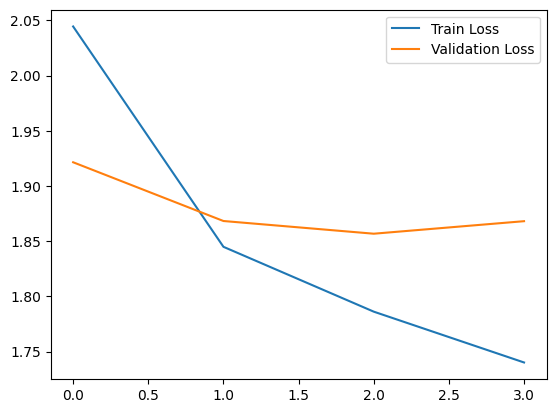

In [52]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.show()

In [53]:
import tabulate

In [56]:
train_loss, train_acc = test(model, train_batches_with_labels)
val_loss, val_acc = test(model, val_batches_with_labels)
test_loss, test_acc = test(model, test_batches_with_labels)

In [57]:
table1 = [["Train", train_loss], ["Val", val_loss], ["Test", test_loss]]
print(tabulate.tabulate(table1, headers=["Dataset", "Loss"]))

Dataset       Loss
---------  -------
Train      1.71668
Val        1.86809
Test       1.8628


In [58]:
table2 = [["Train", train_acc], ["Val", val_acc], ["Test", test_acc]]
print(tabulate.tabulate(table2, headers=["Dataset", "Accuracy"]))

Dataset      Accuracy
---------  ----------
Train        0.902395
Val          0.752124
Test         0.760232


The result looks nice, it does not seem as the model would overfit or something like that. (We would not expect that with one linear layer anyway, but hey). Although we do see that the validation loss bottoms out relatively quickly.

<a name="section-taskB"></a><h2 style="color:rgb(0,120,170)">Task B: Document Classification with BERT (15 points)</h2>

This task aims to conduct the same document classification as Task A, but now by utilizing a pre-trained BERT model. Feel free to reuse any code from the previous task. The implementation of the classifier should cover the points below.

**Loading BERT model (2 points):** Use the `transformers` library from `huggingface` to load a (small) pre-trained BERT model. Select a BERT model according to your available resources. The available models can be found [here](https://huggingface.co/models) and [here](https://github.com/google-research/bert).

**BERT tokenization (3 points):** For training BERT models, we do not need to create a dictionary anymore, as a BERT model already contains an internal subword dictionary. Following the instruction in `transformers`'s documentation, tokenize the data using the BERT model.  

**Model definition and forward function (5 points):** Define the class **`ClassificationBERTModel`** as a PyTorch model. In the initialization procedure, the model receives the loaded BERT model and stores it as the model's parameter. The parameters of the BERT model should be trainable. The forward function of the model receives a batch of data, passes this batch to BERT, and achieves the corresponding document embeddings from the output of BERT. Similar to the previous task, the document embeddings are used for classification by linearly transforming document embeddings to the vectors with the number of classes, followed by applying Softmax.

**Training and overall functionality (3 points):** Train the model in a similar fashion to the previous task, namely with the proper loss function, optimization, and early stoping.

**Test Set Evaluation (1 point):** After finishing the training, load the (already stored) best performing model, and use it for class prediction on the test set.

**Reporting (1 point):** Report the results of the best performing model on the validation and test set in a table.


## Loading the BERT model and the tokenizer

For this we are using "**DistilBERT**", found at https://huggingface.co/docs/transformers/model_doc/distilbert.

We load a new BERT model for each training run and for each testing procedure.

We tokenize the data in the `custom_collate` function of the data loader. This is because the `tokenizer` provides convinient functionality for batching.

In [59]:
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F

In [60]:
#!pip install transformers
from transformers import AutoModel
from transformers import AutoTokenizer

model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

## Model definition and forward function

In [61]:
class ClassificationBERTModel(nn.Module):
    def __init__(self, loaded_bert, num_classes):
        super(ClassificationBERTModel, self).__init__()
        self.bert_model = loaded_bert
        bert_embed_size = self.bert_model.config.hidden_size
        self.linear     = nn.Linear(bert_embed_size, num_classes)
        for param in self.bert_model.parameters():  # make the model trainable
            param.requires_grad = True

    def forward(self, batch):
        outputs        = self.bert_model(**batch)      # batches must already be tokenized
        embeddings     = outputs.last_hidden_state     # output is of shape [batch_size, max_length, embedding_size]
        sentence_embed = embeddings[:, 0, :]           # first vector for each sentence gives embedding of whole sentence [batch_size, embedding_size]
        class_output   = self.linear(sentence_embed)   # output is of shape [batch_size, num_classes]
        probabilities  = F.softmax(class_output, dim=-1)
        return probabilities

## Training

### DataSet and DataLoader

In [62]:
class BERTdata(torch.utils.data.Dataset):
    def __init__(self, data, targets):
        self.data    = data
        self.targets = torch.Tensor(targets).type(torch.LongTensor)

    def __getitem__(self, index):
        return self.data[index], self.targets[index]

    def __len__(self):
        return len(self.targets)


class BERTloader(torch.utils.data.DataLoader):
    def __init__(self, data, targets, tokenizer, device, max_length=64, batch_size=32, shuffle=True, num_workers=0, custom_collate=None):
        dataset = BERTdata(data, targets)
        super().__init__(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers,
                         collate_fn=lambda x: custom_collate(x, tokenizer=tokenizer, device=device, max_length=max_length))

def custom_collate(batch, tokenizer, device, max_length=64):
    data, targets = zip(*batch)
    data = tokenizer(data, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
    targets = torch.stack(targets)
    return data, targets

### Training

In [63]:
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

criterion = nn.CrossEntropyLoss()

mps


In [64]:
def train(net, optimizer, criterion, train_loader, val_loader, device, epochs=10, EARLY_STOPPING=3):
    BEST_MODEL    = None
    BEST_VAL_LOSS = float('inf')
    train_losses  = []
    valid_losses  = []

    for epoch in range(epochs):

        # Training loop
        net.train()
        running_loss = 0.0
        for batch in tqdm(train_loader):
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            optimizer.zero_grad()
            output = net(inputs)
            loss   = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        

        # Evaulation loop
        net.eval()
        running_loss = 0.0
        for batch in val_loader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            output = net(inputs)
            loss   = criterion(output, labels)
            running_loss += loss.item()
        valid_losses.append(running_loss / len(val_loader))

        print(f"Epoch {epoch + 1} Train Loss: {train_losses[-1]:6.4f}, Val Loss: {valid_losses[-1]:6.4f}")

        # Early stopping
        if valid_losses[-1] < BEST_VAL_LOSS:
            BEST_VAL_LOSS = valid_losses[-1]
            BEST_MODEL    = net.state_dict()
            early_stopping_rounds = 1
        else:
            early_stopping_rounds += 1
            if early_stopping_rounds == EARLY_STOPPING:
                print(f"Early stopping after {epoch + 1} epochs")
                break

    return BEST_MODEL, train_losses, valid_losses

In [65]:
def get_trained_model(net=None,
                      optimizer=None,
                      criterion=None,
                      train_loader=None,
                      val_loader=None,
                      model_path=None,
                      train_new_model=False,
                      device='cpu',
                      epochs=10,
                      early_stopping_rounds=2):
    """
    Get a trained model.
    :param net: model to train
    :param optimizer: optimizer to use
    :param criterion: loss function to use
    :param train_loader: training data
    :param val_loader: validation data
    :param model_path: path to model to load
    :param train_new_model: whether to train a new model
    :param device: the device to send the data to
    :param epochs: number of epochs to train
    :return: trained model, train losses, validation losses
    """
    if model_path is not None:
        net.load_state_dict(torch.load(model_path))
    else:
        if train_new_model:
            net = net or ClassificationBERTModel(AutoModel.from_pretrained(model_name), len(id2name)).to(device)
            optimizer = optimizer or optim.Adam(net.parameters(), lr=1e-5)
            net, train_losses, val_losses = train(net, optimizer, criterion, train_loader, val_loader, device, epochs, early_stopping_rounds)
            torch.save(net, "model.pt")
    return net, train_losses, val_losses

In [66]:
# This code can be used to train on a subset and test hyperparameters

batch_size = 8
max_length = 64

num_train_batches = 5
num_val_batches   = 5
num_test_batches  = 100

train_len = batch_size * num_train_batches
val_len   = batch_size * num_val_batches
test_len  = batch_size * num_test_batches

train_data = BERTloader(train_df['data'].tolist()[:train_len], train_df['label'][:train_len], tokenizer, device, custom_collate=custom_collate, batch_size=batch_size, max_length=max_length)
val_data   = BERTloader(val_df['data'].tolist()[:val_len], val_df['label'][:val_len], tokenizer, device, custom_collate=custom_collate, batch_size=batch_size, max_length=max_length)
test_data  = BERTloader(test_df['data'].tolist()[:test_len], test_df['label'][:test_len], tokenizer, device, custom_collate=custom_collate, batch_size=batch_size, max_length=max_length)

In [67]:
# This code is used to train on the full dataset

train_data = BERTloader(train_df['data'].tolist(), train_df['label'], tokenizer, device, custom_collate=custom_collate, batch_size=32, max_length=64)
val_data   = BERTloader(val_df['data'].tolist(), val_df['label'], tokenizer, device, custom_collate=custom_collate, batch_size=32, max_length=64)
test_data  = BERTloader(test_df['data'].tolist(), test_df['label'], tokenizer, device, custom_collate=custom_collate, batch_size=32, max_length=64)

In [68]:
net, train_losses, val_losses = get_trained_model(None, None, criterion,
                                                  train_data, val_data,
                                                  model_path=None, train_new_model=True,
                                                  device=device, epochs=16, early_stopping_rounds=6)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [06:14<00:00,  1.01it/s]


Epoch 1 Train Loss: 2.0217, Val Loss: 1.8574


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:37<00:00,  1.12it/s]


Epoch 2 Train Loss: 1.8449, Val Loss: 1.8374


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:32<00:00,  1.14it/s]


Epoch 3 Train Loss: 1.8194, Val Loss: 1.8229


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:28<00:00,  1.15it/s]


Epoch 4 Train Loss: 1.7967, Val Loss: 1.8142


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:34<00:00,  1.13it/s]


Epoch 5 Train Loss: 1.7817, Val Loss: 1.8169


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:36<00:00,  1.13it/s]


Epoch 6 Train Loss: 1.7678, Val Loss: 1.8075


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:42<00:00,  1.11it/s]


Epoch 7 Train Loss: 1.7558, Val Loss: 1.8047


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:36<00:00,  1.13it/s]


Epoch 8 Train Loss: 1.7477, Val Loss: 1.7999


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:42<00:00,  1.11it/s]


Epoch 9 Train Loss: 1.7424, Val Loss: 1.8029


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:39<00:00,  1.12it/s]


Epoch 10 Train Loss: 1.7369, Val Loss: 1.8003


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:35<00:00,  1.13it/s]


Epoch 11 Train Loss: 1.7320, Val Loss: 1.8076


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:34<00:00,  1.13it/s]


Epoch 12 Train Loss: 1.7282, Val Loss: 1.8008


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:26<00:00,  1.16it/s]


Epoch 13 Train Loss: 1.7260, Val Loss: 1.7977


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:27<00:00,  1.16it/s]


Epoch 14 Train Loss: 1.7224, Val Loss: 1.7996


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:37<00:00,  1.12it/s]


Epoch 15 Train Loss: 1.7194, Val Loss: 1.7982


100%|█████████████████████████████████████████████████████████████████████████████████████████| 379/379 [05:45<00:00,  1.10it/s]


Epoch 16 Train Loss: 1.7167, Val Loss: 1.8044


## Testing and Reporting

In [69]:
def test(net, data_loader, criterion, device):
    net.eval()
    running_loss = 0.0
    correct      = 0
    total        = 0

    with torch.no_grad():
        for batch in tqdm(data_loader):
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            output = net(inputs)
            loss   = criterion(output, labels)
            running_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return running_loss / len(data_loader), correct / total

In [70]:
import tabulate

model = ClassificationBERTModel(AutoModel.from_pretrained(model_name), len(id2name)).to(device)
model.load_state_dict(net)

train_loss, train_acc = test(model, train_data, criterion, device)
val_loss, val_acc     = test(model, val_data, criterion, device)
test_loss, test_acc   = test(model, test_data, criterion, device)

table1 = [["Train", train_loss], ["Val", val_loss], ["Test", test_loss]]
table2 = [["Train", train_acc], ["Val", val_acc], ["Test", test_acc]]

print(tabulate.tabulate(table1, headers=["Dataset", "Loss"]))
print()
print(tabulate.tabulate(table2, headers=["Dataset", "Accuracy"]))

100%|███████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:23<00:00,  3.44it/s]

Dataset       Loss
---------  -------
Train      1.71215
Val        1.7993
Test       1.80165

Dataset      Accuracy
---------  ----------
Train        0.906771
Val          0.817411
Test         0.81657


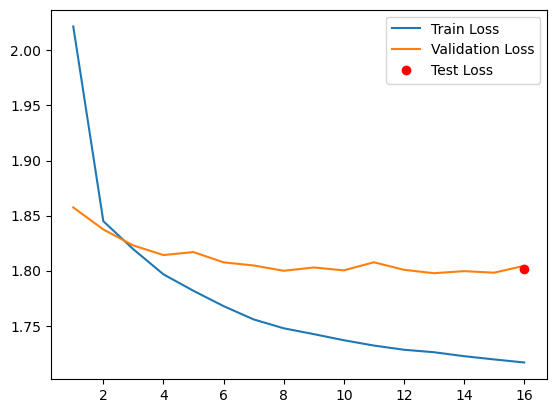

In [71]:
plt.plot(range(1, len(train_losses)+1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses)+1), val_losses, label="Validation Loss")
plt.plot(len(train_losses), test_loss, "ro", label="Test Loss")
plt.legend()
plt.show()

It appears that the model learns well. Furthermore it looks like performance could still improve with futher training.

We conducted multiple experiments with a subset of the data for faster testing, which showed that the improvements of training for longer than 16 epochs does improve performance and that overfitting is not an issue, even if training set accuracy reaches 1.0, but that the improvements on the validation set are marginal. We also tested different learning rates, different values for the maximum length of a text (via the `max_length` argument of the tokenizer), different batch sizes, and tried using "tiny BERT" (gaunernst/bert-tiny-uncased). None of these showed any significantly better performance over the current settings. Tiny BERT was about ten times faster but could not achieve an accuracy of over 0.6.